In [1]:
#importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import zscore
import seaborn as sns
import mtgsdk


In [2]:
#load data
df=pd.read_csv("card-win-rates-2020-11-08.csv")

In [3]:
#take only games where neither player mulliganed
clean_games=df[df['num_mulligans'] + df['opp_num_mulligans']==0].reset_index(drop=True)
clean_games

,draft_time,expansion,event_type,game_number,rank,on_play,num_mulligans,opp_num_mulligans,opp_colors,num_turns,...,deck_Veteran Adventurer,deck_Vine Gecko,deck_Wayward Guide-Beast,deck_Windrider Wizard,"deck_Yasharn, Implacable Earth","deck_Zagras, Thief of Heartbeats","deck_Zareth San, the Trickster",deck_Zof Bloodbog,deck_Zof Consumption,deck_Zulaport Duelist
0,2020-11-06 05:21:02,ZNR,PremierDraft,1,Gold-2-0-0-4,False,0,0,RG,8,...,0,0,0,0,0,0,0,0,0,0
1,2020-11-06 05:21:02,ZNR,PremierDraft,1,Gold-2-0-0-3,False,0,0,WU,13,...,0,0,0,0,0,0,0,0,0,0
2,2020-11-06 05:21:02,ZNR,PremierDraft,1,Gold-1-0-0-0,True,0,0,WU,10,...,0,0,0,0,0,0,0,0,0,0
3,2020-11-06 05:21:02,ZNR,PremierDraft,1,Gold-1-0-0-2,True,0,0,WG,7,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-30 03:57:45,ZNR,PremierDraft,1,Platinum-1-0-0-0,True,0,0,UB,9,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68381,2020-10-03 14:45:29,ZNR,PremierDraft,1,Gold-1-0-0-2,True,0,0,WB,8,...,1,0,0,0,0,0,0,0,0,0
68382,2020-10-03 14:45:29,ZNR,PremierDraft,1,Gold-1-0-0-4,True,0,0,WUB,9,...,1,0,0,0,0,0,0,0,0,0
68383,2020-10-03 14:45:29,ZNR,PremierDraft,1,Platinum-4-0-0-1,True,0,0,UB,21,...,1,0,0,0,0,0,0,0,0,0
68384,2020-10-03 14:45:29,ZNR,PremierDraft,1,Platinum-4-0-0-2,True,0,0,UB,13,...,1,0,0,0,0,0,0,0,0,0


In [4]:
#looking at just basic lands
lands=clean_games[['deck_Plains','deck_Island','deck_Swamp','deck_Mountain','deck_Forest']]

In [5]:
#look at just deck inclusions
clean_deck=clean_games.iloc[:,623:928]

#cleaning up the column names
new_col_names=[]
for name in clean_deck.columns:
    new_col_names.append(name[5:])
clean_deck.columns=new_col_names
clean_deck

,Acquisitions Expert,Adventure Awaits,Agadeem's Awakening,"Agadeem, the Undercrypt","Akiri, Fearless Voyager",Akoum Hellhound,Akoum Teeth,Akoum Warrior,Allied Assault,Ancient Greenwarden,...,"Verazol, the Split Current",Veteran Adventurer,Vine Gecko,Wayward Guide-Beast,Windrider Wizard,"Yasharn, Implacable Earth","Zagras, Thief of Heartbeats","Zareth San, the Trickster",Zof Bloodbog,Zof Consumption
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68381,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
68382,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
68383,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
68384,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
#create a dictionary of cardname : color identity for deck classification
cards=mtgsdk.Card.where(set='znr').all()

In [7]:
color_ID={}
for card in cards:
    color_ID[card.name]=card.color_identity
for key in color_ID:
    print(key,color_ID[key])

Acquisitions Expert ['B']
Adventure Awaits ['G']
Agadeem, the Undercrypt ['B']
Agadeem's Awakening ['B']
Akiri, Fearless Voyager ['R', 'W']
Akoum Hellhound ['R']
Akoum Teeth ['R']
Akoum Warrior ['R']
Allied Assault ['W']
Ancient Greenwarden ['G']
Angel of Destiny ['W']
Angelheart Protector ['W']
Anticognition ['U']
Archon of Emeria ['W']
Archpriest of Iona ['W']
Ardent Electromancer ['R']
Ashaya, Soul of the Wild ['G']
Attended Healer ['W']
Bala Ged Sanctuary ['G']
Bala Ged Recovery ['G']
Base Camp []
Beyeen Coast ['U']
Beyeen Veil ['U']
Blackbloom Bog ['B']
Blackbloom Rogue ['B']
Blood Beckoning ['B']
Blood Price ['B']
Bloodchief's Thirst ['B']
Boulderloft Pathway ['G', 'W']
Branchloft Pathway ['G', 'W']
Grimclimb Pathway ['B', 'W']
Brightclimb Pathway ['B', 'W']
Broken Wings ['G']
Brushfire Elemental ['G', 'R']
Bubble Snare ['U']
Canopy Baloth ['G']
Canyon Jerboa ['W']
Cascade Seer ['U']
Charix, the Raging Isle ['U']
Chilling Trap ['U']
Cinderclasm ['R']
Cleansing Wildfire ['R']
Murk

In [8]:
#now looking at whether cards are land vs nonland
land={}
for card in cards:
    if 'Land' in card.type:
        land[card.name]=True
    else:
        land[card.name]=False
for key in land:
    print(key,land[key])

Acquisitions Expert False
Adventure Awaits False
Agadeem, the Undercrypt True
Agadeem's Awakening False
Akiri, Fearless Voyager False
Akoum Hellhound False
Akoum Teeth True
Akoum Warrior False
Allied Assault False
Ancient Greenwarden False
Angel of Destiny False
Angelheart Protector False
Anticognition False
Archon of Emeria False
Archpriest of Iona False
Ardent Electromancer False
Ashaya, Soul of the Wild False
Attended Healer False
Bala Ged Sanctuary True
Bala Ged Recovery False
Base Camp True
Beyeen Coast True
Beyeen Veil False
Blackbloom Bog True
Blackbloom Rogue False
Blood Beckoning False
Blood Price False
Bloodchief's Thirst False
Boulderloft Pathway True
Branchloft Pathway True
Grimclimb Pathway True
Brightclimb Pathway True
Broken Wings False
Brushfire Elemental False
Bubble Snare False
Canopy Baloth False
Canyon Jerboa False
Cascade Seer False
Charix, the Raging Isle False
Chilling Trap False
Cinderclasm False
Cleansing Wildfire False
Murkwater Pathway True
Clearwater Pathway

In [9]:
#creating a method that labels decks
def classify_deck (row,_allow_splash=True,_combine_splash=False):
    _red_lands=0
    _white_lands=0
    _blue_lands=0
    _green_lands=0
    _black_lands=0
    _red_cards=0
    _white_cards=0
    _blue_cards=0
    _green_cards=0
    _black_cards=0

    for count,name in zip(row.values,row.index):
        if 'W' in color_ID[name]:
            if land[name]:
                _white_lands+=count
            else:
                _white_cards+=count
        if 'U' in color_ID[name]:
            if land[name]:
                _blue_lands+=count
            else:
                _blue_cards+=count
        if 'B' in color_ID[name]:
            if land[name]:
                _black_lands+=count
            else:
                _black_cards+=count
        if 'R' in color_ID[name]:
            if land[name]:
                _red_lands+=count
            else:
                _red_cards+=count
        if 'G' in color_ID[name]:
            if land[name]:
                _green_lands+=count
            else:
                _green_cards+=count
    
    _W=0
    _U=0
    _B=0
    _R=0
    _G=0
    
    if _white_lands>0 and _white_cards>0:
        _W+=1
        if _white_lands>3 and _white_cards>3:
            _W+=1
    if _blue_lands>0 and _blue_cards>0:
        _U+=1
        if _blue_lands>3 and _blue_cards>3:
            _U+=1
    if _black_lands>0 and _black_cards>0:
        _B+=1
        if _black_lands>3 and _black_cards>3:
            _B+=1
    if _red_lands>0 and _red_cards>0:
        _R+=1
        if _red_lands>3 and _red_cards>3:
            _R+=1
    if _green_lands>0 and _green_cards>0:
        _G+=1
        if _green_lands>3 and _green_cards>3:
            _G+=1
      
    
    _deck_type="Jank"
    if _W==2:
        if _U==2:
            if (_B+_R+_G)==1:
                if _allow_splash:
                    _deck_type="WU+Splash"
                elif _combine_splash:
                    _deck_type="WU"
            elif (_B+_R+_G)==0:
                _deck_type="WU"
            elif _B==2 and _R+_G==0:
                _deck_type="WUB"
            elif _B==2 and _R+_G==1:
                if _allow_splash:
                    _deck_type="WUB+Splash"
                elif _combine_splash:
                    _deck_type="WUB"
            elif _R==2 and _B+_G==0:
                _deck_type="WUR"
            elif _R==2 and _B+_G==1:
                if _allow_splash:
                    _deck_type="WUR+Splash"
                elif _combine_splash:
                    _deck_type="WUR"
            elif _G==2 and _B+_R==0:
                _deck_type="WUG"
            elif _G==2 and _B+_R==1:
                if _allow_splash:
                    _deck_type="WUG+Splash"
                elif _combine_splash:
                    _deck_type="WUG"
        elif _B==2:
            if (_U+_R+_G)==1:
                if _allow_splash:
                    _deck_type="WB+Splash"
                elif _combine_splash:
                    _deck_type="WB"
            elif (_U+_R+_G)==0:
                _deck_type="WB"
            elif _R==2 and _U+_G==0:
                _deck_type="WBR"
            elif _R==2 and _U+_G==1:
                if _allow_splash:
                    _deck_type="WBR+Splash"
                elif _combine_splash:
                    _deck_type="WBR"
            elif _G==2 and _U+_R==0:
                _deck_type="WBG"
            elif _G==2 and _U+_R==1:
                if _allow_splash:
                    _deck_type="WBG+Splash"
                elif _combine_splash:
                    _deck_type="WBG"
        elif _R==2:
            if (_U+_B+_G)==1:
                if _allow_splash:
                    _deck_type="WR+Splash"
                elif _combine_splash:
                    _deck_type="WR"
            elif (_U+_B+_G)==0:
                _deck_type="WR"
            elif _G==2 and _U+_B==0:
                _deck_type="WRG"
            elif _G==2 and _U+_B==1:
                if _allow_splash:
                    _deck_type="WRG+Splash"
                elif _combine_splash:
                    _deck_type="WRG"
        elif _G==2:
            if (_U+_B+_R)==1:
                if _allow_splash:
                    _deck_type="WG+Splash"
                elif _combine_splash:
                    _deck_type="WG"
            elif (_U+_B+_R)==0:
                _deck_type="WG"
        elif _U+_B+_R+_G>=1:
            if _allow_splash:
                _deck_type="MonoW+Splash"
            elif _combine_splash:
                _deck_type="MonoW"
        elif _U+_B+_R+_G==0:
            _deck_type="MonoW"
    elif _U==2:
        if _B==2:
            if (_W+_R+_G)==1:
                if _allow_splash:
                    _deck_type="UB+Splash"
                elif _combine_splash:
                    _deck_type="UB"
            elif (_W+_R+_G)==0:
                _deck_type="UB"
            elif _R==2 and _G+_W==0:
                _deck_type="UBR"
            elif _R==2 and _G+_W==1:
                if _allow_splash:
                    _deck_type="UBR+Splash"
                elif _combine_splash:
                    _deck_type="UBR"
            elif _G==2 and _R+_W==0:
                _deck_type="UBG"
            elif _G==2 and _R+_W==1:
                if _allow_splash:
                    _deck_type="UBG+Splash"
                elif _combine_splash:
                    _deck_type="UBG"
        elif _R==2:
            if (_W+_B+_G)==1:
                if _allow_splash:
                    _deck_type="UR+Splash"
                elif _combine_splash:
                    _deck_type="UR"
            elif (_W+_B+_G)==0:
                _deck_type="UR"
            elif _G==2 and _B+_W==0:
                _deck_type="URG"
            elif _G==2 and _B+_W==1:
                if _allow_splash:
                    _deck_type="URG+Splash"
                elif _combine_splash:
                    _deck_type="URG"
        elif _G==2:
            if (_W+_B+_R)==1:
                if _allow_splash:
                    _deck_type="UG+Splash"
                elif _combine_splash:
                    _deck_type="UG"
            elif (_W+_B+_R)==0:
                _deck_type="UG"
        elif _W+_B+_R+_G>=1:
            if _allow_splash:
                _deck_type="MonoU+Splash"
            elif _combine_splash:
                _deck_type="MonoU"
        elif _W+_B+_R+_G==0:
            _deck_type="MonoU"
    elif _B==2:
        if _R==2:
            if (_W+_U+_G)==1:
                if _allow_splash:
                    _deck_type="BR+Splash"
                elif _combine_splash:
                    _deck_type="BR"
            elif (_W+_U+_G)==0:
                _deck_type="BR"
            elif _G==2 and _W+_U==0:
                _deck_type="BRG"
            elif _G==2 and _W+_U==1:
                if _allow_splash:
                    _deck_type="BRG+Splash"
                elif _combine_splash:
                    _deck_type="BRG"
        elif _G==2:
            if (_W+_U+_R)==1:
                if _allow_splash:
                    _deck_type="BG+Splash"
                elif _combine_splash:
                    _deck_type="BG"
            elif (_W+_U+_R)==0:
                _deck_type="BG"
        elif _W+_U+_R+_G>=1:
            if _allow_splash:
                _deck_type="MonoB+Splash"
            elif _combine_splash:
                _deck_type="MonoB"
        elif _W+_U+_R+_G==0:
            _deck_type="MonoB"
    elif _R==2:
        if _G==2:
            if (_W+_U+_B)==1:
                if _allow_splash:
                    _deck_type="RG+Splash"
                elif _combine_splash:
                    _deck_type="RG"
            elif (_W+_U+_B)==0:
                _deck_type="RG"
        elif _W+_U+_B+_G>=1:
            if _allow_splash:
                _deck_type="MonoR+Splash"
            elif _combine_splash:
                _deck_type="MonoR"
        elif _W+_U+_B+_G==0:
            _deck_type="MonoR"
    elif _G==2:
        if _W+_U+_B+_R>=1:
            if _allow_splash:
                _deck_type="MonoG+Splash"
            elif _combine_splash:
                _deck_type="MonoG"
        elif _W+_U+_B+_R==0:
            _deck_type="MonoG"
            
            
                
    return _deck_type
        
            
                
        
            
cluster_names=clean_deck.apply(lambda row: classify_deck(row,_allow_splash=False,_combine_splash=True), axis=1)

In [10]:
cluster_names.value_counts()

WB       9272
UG       8838
UB       8719
UR       8642
WR       8288
BR       8280
RG       3753
WU       3740
BG       3451
WG       2559
Jank      573
MonoU     508
MonoR     315
MonoG     278
WUB       179
URG       157
WRG       121
WBR       114
UBG       113
UBR        97
WBG        95
MonoB      91
BRG        73
WUG        46
MonoW      45
WUR        39
dtype: int64

In [11]:
clean_deck['deck_type']=cluster_names
#need to add whether or not the deck won into the decklist
clean_deck['won']=clean_games['won']
#checking
clean_deck.head()

,Acquisitions Expert,Adventure Awaits,Agadeem's Awakening,"Agadeem, the Undercrypt","Akiri, Fearless Voyager",Akoum Hellhound,Akoum Teeth,Akoum Warrior,Allied Assault,Ancient Greenwarden,...,Vine Gecko,Wayward Guide-Beast,Windrider Wizard,"Yasharn, Implacable Earth","Zagras, Thief of Heartbeats","Zareth San, the Trickster",Zof Bloodbog,Zof Consumption,deck_type,won
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BR,False
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BR,True
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BR,False
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BR,False
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,UG,False


In [12]:
#selecting just 2 color combinations
list_of_decks=['WB','UB','UR','WR','BR','UG','WU','RG','BG','WG']
list_of_splashes=['WB+Splash','UB+Splash','UR+Splash','WR+Splash','BR+Splash','UG+Splash','WU+Splash','RG+Splash','BG+Splash','WG+Splash']

In [14]:
#This cell will separate out each of the listed decks, z-score the cards included by deck, separate winning and losing
#decks, then subtract the losses from the wins. Finally it will create a dataframe of results

#use this to store results
results_list=[]

for i,deck in enumerate(list_of_decks):
    #grab only the selected deck
    temp_deck=clean_deck[clean_deck['deck_type']==deck]
    #apply z-score to all but 'won' and 'deck_name'
    temp_deck.iloc[:,:-2]=temp_deck.iloc[:,:-2].apply(zscore)
    #separate wins and losses
    temp_wins=temp_deck[temp_deck['won']==True]
    temp_losses=temp_deck[temp_deck['won']==False]
    #subtract the z-scores of losses from wins.
    diff=temp_wins.iloc[:,:-2].mean(axis=0)-temp_losses.iloc[:,:-2].mean(axis=0)
    #store the result
    results_list.append(diff)
#make the result a dataframe
results=pd.DataFrame(results_list)
#add the deck name in and set it as index
results['deck']=pd.Series(list_of_decks)
results=results.set_index('deck')
#drop any rows of all missing values. Necessary for MDCs
results=results.dropna(axis=1,how="all")
#round the z-scores to 3 decimal places
results=results.round(3)

C:\Users\gamui\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\gamui\anaconda3\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
C:\Users\gamui\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\gamui\anaconda3\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [15]:
# # do some dataframe styling

# def color_code(val):
#     """
#     Takes a scalar and returns a string with
#     the css property `'color: red'` for negative
#     strings, black otherwise.
#     """
     
#     if val < -0.1:
#         color = 'red'
#     elif val > 0.1: 
#         color = 'green' 
#     else: 
#         color = 'black'
#     return 'color: %s' % color

# def highlight_max_min(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_max = s == s.max()
#     is_min = s == s.min()
#     is_either = [mx or mn for mx,mn in zip(is_max,is_min)]
#     return ['background-color: yellow' if v else '' for v in is_either]

# def highlight_max(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_max = s == s.max()
#     return ['background-color: green' if v else '' for v in is_max]

# def highlight_min(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_min = s == s.min()
#     return ['background-color: red' if v else '' for v in is_min]

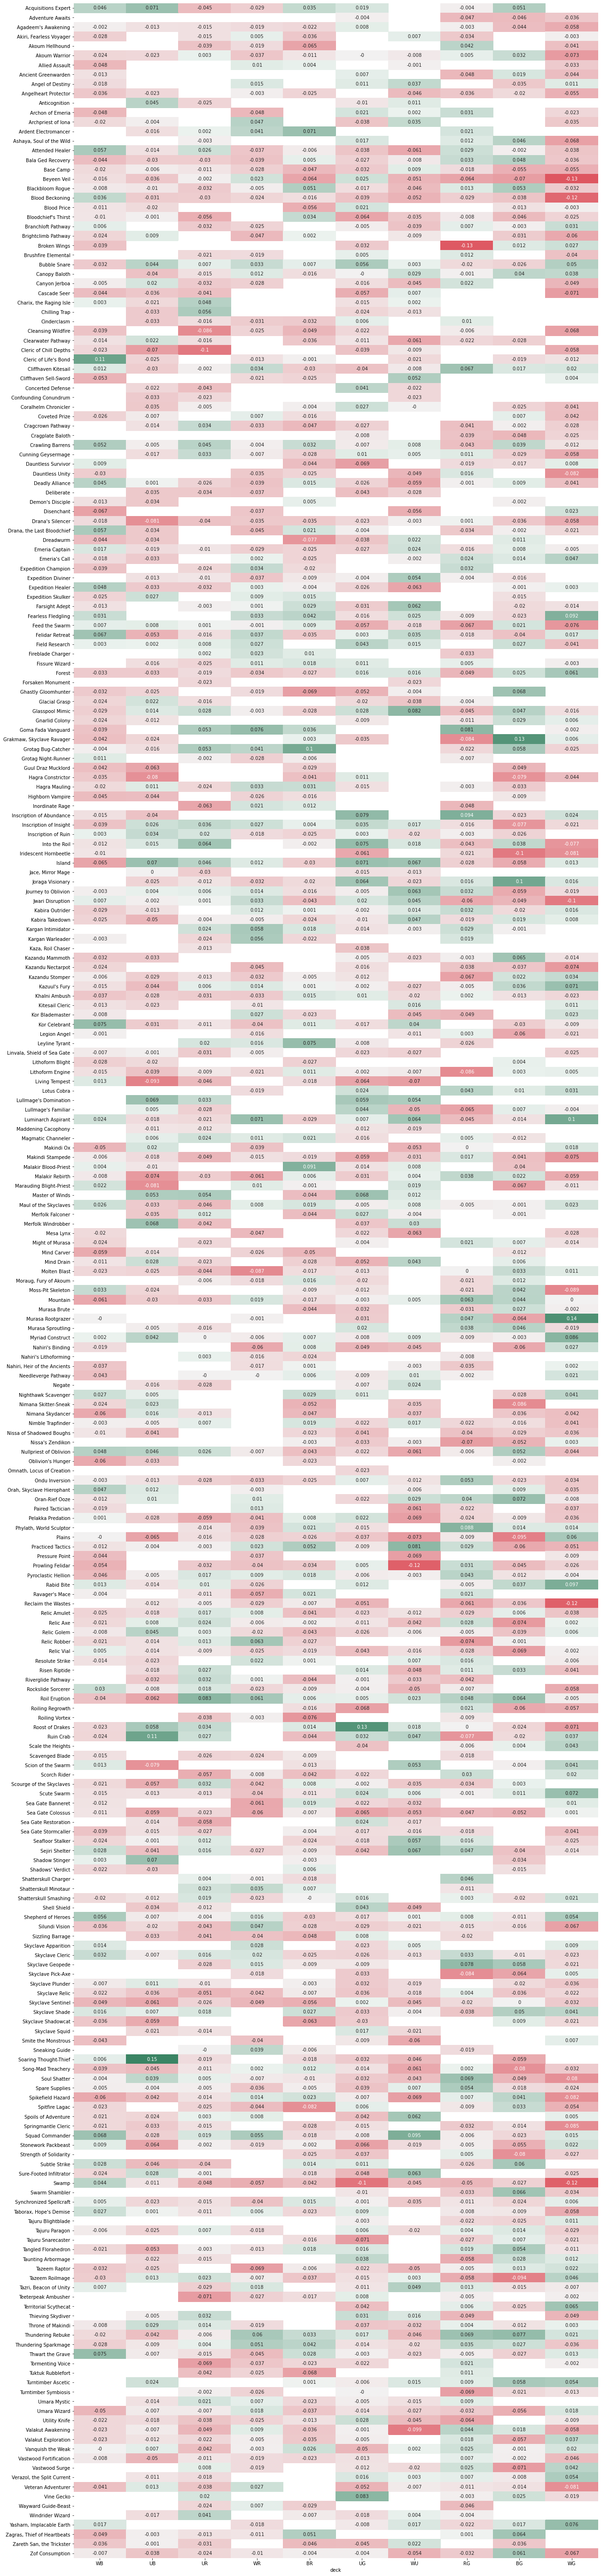

In [16]:
#Do some visualizations

#first set the figuresize to be appropriate
plt.rcParams["figure.figsize"] = (20,100)

#create a red-green diverging color palette
cm = sns.diverging_palette(10, 150, as_cmap=True)
#transpose the dataframe and apply the styling. Save to excel
s = results.T.style.background_gradient(cmap=cm)
s.to_excel("styled.xlsx")

#create a heatmap and save the figure to .png
hmap=sns.heatmap(results.T,cmap=cm,center=0,annot=True,cbar=False)
figure=hmap.get_figure()
figure.savefig('output.png')
plt.show()

In [17]:
rr_deck=clean_deck[clean_deck['Relic Robber']>0]
rr_gruul=rr_deck[rr_deck['deck_type']=='RG']
rr_boros=rr_deck[rr_deck['deck_type']=='WR']

In [18]:
pd.set_option('display.max_rows', 500)
boros_means=rr_boros.mean()
boros_means[boros_means !=0].sort_values(ascending=False)

Mountain                        7.502304
Plains                          7.279570
Grotag Bug-Catcher              1.144393
Relic Robber                    1.010753
Roil Eruption                   0.930876
Expedition Champion             0.921659
Ardent Electromancer            0.769585
Cliffhaven Sell-Sword           0.718894
won                             0.629800
Sneaking Guide                  0.620584
Stonework Packbeast             0.608295
Kabira Outrider                 0.577573
Practiced Tactics               0.569892
Shepherd of Heroes              0.563748
Teeterpeak Ambusher             0.557604
Fissure Wizard                  0.551459
Kargan Warleader                0.534562
Cliffhaven Kitesail             0.516129
Sea Gate Banneret               0.490015
Nahiri's Binding                0.482335
Pyroclastic Hellion             0.433180
Synchronized Spellcraft         0.431644
Expedition Healer               0.425499
Kazuul's Fury                   0.397849
Angelheart Prote

In [19]:
gruul_means=rr_gruul.mean()
gruul_means[gruul_means !=0].sort_values(ascending=False)

Mountain                       7.536398
Forest                         7.402299
Relic Robber                   1.011494
Grotag Bug-Catcher             0.938697
Pyroclastic Hellion            0.865900
Roil Eruption                  0.796935
Rabid Bite                     0.789272
Canopy Baloth                  0.743295
Gnarlid Colony                 0.727969
Brushfire Elemental            0.651341
Fissure Wizard                 0.639847
Sneaking Guide                 0.624521
Territorial Scythecat          0.609195
Ardent Electromancer           0.597701
Song-Mad Treachery             0.509579
Joraga Visionary               0.478927
Teeterpeak Ambusher            0.463602
won                            0.459770
Stonework Packbeast            0.452107
Reclaim the Wastes             0.448276
Dauntless Survivor             0.409962
Kazuul's Fury                  0.406130
Synchronized Spellcraft        0.402299
Veteran Adventurer             0.390805
Kazandu Stomper                0.390805
